## Geometric Learning with Geomstats

In [1]:
import numpy as np
import geomstats.backend as gs
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.hypersphere import HypersphereMetric
from geomstats.information_geometry.beta import BetaDistributions
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

import matplotlib.pyplot as plt
import geomstats.visualization as visualization

### Hypersphere Tangent Space

In [2]:
# Release the Hypersphere
manifold = Hypersphere(dim=2, intrinsic=False, equip=True)

# Generate data points on it
samples = manifold.random_uniform(n_samples=256)

In [3]:
# Generate the tangent vector st the 3rd sample location on the Hypersphere
vector = gs.array([0.8,0.4,0.7])
tangent_vec = manifold.to_tangent(vector,base_point=samples[2])

In [4]:
# Get Riemannian metric
metric = HypersphereMetric(manifold)

# Compute the end point using the exponential map
end_point = metric.exp(tangent_vec=tangent_vec, base_point=samples[2])

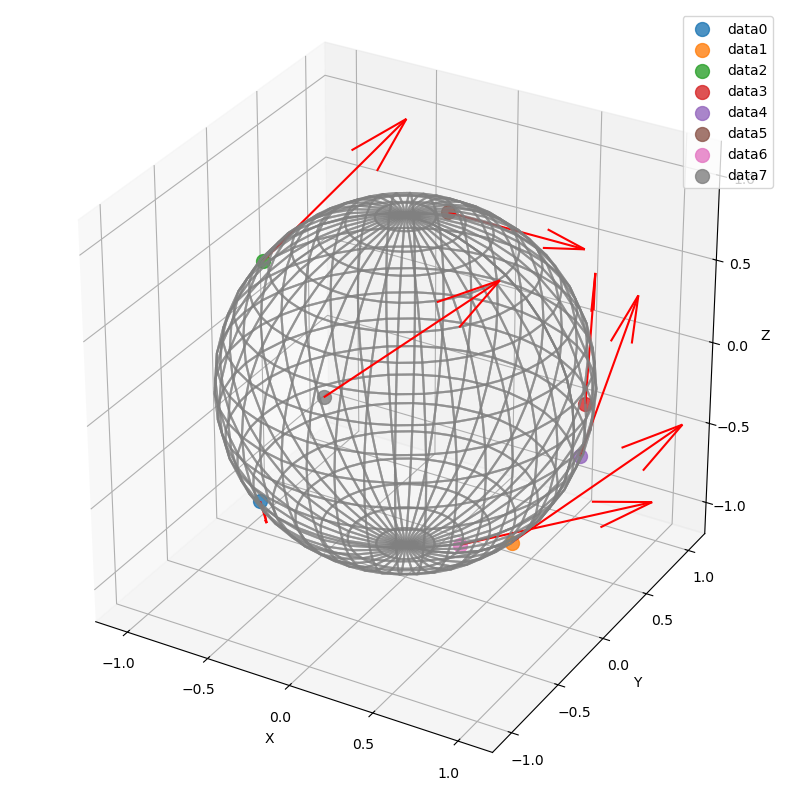

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")

# Walk through the list of data points on the manifold
for idx, point in enumerate(samples[:8]):
    #Plot the sampled point on the Hypersphere
    ax = visualization.plot(
        point,
        ax=ax,
        space="S2",
        s=100,
        alpha=0.8,
        label=f'data{idx}')

    # Compute the tangent vector at this point
    tgt_vec = manifold.to_tangent(vector, base_point = point)
    
    # Get end_point using the exponential map
    metric = HypersphereMetric(manifold)

    #Draw the tangnt vector on 3D grid
    arrow = visualization.Arrow3D(point, vector = tgt_vec)
    arrow.draw(ax, color="red")

ax.grid()
ax.legend()
plt.show()

### Beta Distribution on Hypersphere

In [10]:
num_pts = 200
num_interpolations = 4
manifold = Hypersphere(dim=2, intrinsic=False, equip=True)

# Generate random point on the Hypersphere
points = manifold.random_uniform(num_pts)
t = gs.linspace(0.1, 0.4, num_interpolations)

# Define the Beta distribution
beta = BetaDistributions()

# Define the beta pdfs associated with each point on the Hypersphere
beta_values_pdfs = [beta.point_to_pdf(pt)(t) for pt in points]

# Generate and normalize probability
for beta_values in beta_values_pdfs:
    min_beta = min(beta_values)
    delta_beta = max(beta_values) - min_beta
    y = [(beta_value - min_beta) / delta_beta for beta_value in beta_values]

print(y)

[np.float64(1.0), np.float64(0.3494299996862988), np.float64(0.11870236198728792), np.float64(0.0)]


### Special Orthogonal Group SO3

In [21]:
# Initialization of base point (Identity) and tangent vector as a 90 degrees rotation around x-axis
dim = 3
x_rotation_90 = [1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0, 0.0]
tgt_vector = np.reshape(x_rotation_90, shape=(3,3))
base_point = gs.eye(dim)

# Instantiate the Lie Group using Geomstats lib
so3_group = SpecialOrthogonal(n=dim, point_type='vector', equip=False)

# Compute the end point on Lie manifold using exponential map
end_point = so3_group.exp(tgt_vector, base_point)

print(f'\nBase point:\n{base_point}\nTangent Vector:\n{tgt_vector}\nEnd Point:\n{end_point}')


Base point:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Tangent Vector:
[[ 1.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  1.  0.]]
End Point:
[[ 2.          0.          0.        ]
 [ 0.          0.91966619 -0.99727038]
 [ 0.          0.99727038  0.91966619]]
